# Airports

### Installations

In [11]:
# !pip3 install --upgrade pip

In [12]:
# %pip install geopandas
# %pip install tabulate

### Imports

In [13]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import contextily as cx

### Display Imports & Their Versions

In [14]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


### Import Dataset

In [15]:
gdf = geopandas.read_file("Boston_Neighborhoods.geojson")

gdf

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.3261, -71.10503 42.3261..."
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.0905 42.3357..."
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.05838 42.34983, -71.05834 42.349..."
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.05791 42.35238, -71.05811 42.352..."
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.052 42.36884, -71.05219 42.36892..."
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((-71.09646 42.29323, -71.09633 42.293..."
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((-71.06834 42.34775, -71.06913 42.347..."


In [16]:
gdf.describe(include='all')

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
count,26.000000,26,26.000000,26,26.000000,2.600000e+01,26.000000,26
unique,NaN,26,NaN,26,NaN,NaN,NaN,26
top,NaN,Roslindale,NaN,15,NaN,NaN,NaN,MULTIPOLYGON (((-71.12592717485386 42.27201310...
freq,NaN,1,NaN,1,NaN,NaN,NaN,1
mean,39.500000,NaN,1204.059122,NaN,1.881154,5.245549e+07,42002.394580,NaN
std,7.648529,NaN,1243.374156,NaN,1.943305,5.417165e+07,30997.396979,NaN
min,27.000000,NaN,15.639908,NaN,0.020000,6.812717e+05,3237.140537,NaN
25%,33.250000,NaN,237.831069,NaN,0.370000,1.035988e+07,17774.525912,NaN
50%,39.500000,NaN,723.366091,NaN,1.130000,3.150970e+07,38125.222073,NaN
75%,45.750000,NaN,1781.698507,NaN,2.787500,7.761048e+07,57219.750774,NaN


### Return Information About Unqiue Values in Select Features

In [17]:
cols_to_check = [
    'OBJECTID',
    'Name',
    'Acres',
    'Neighborhood_ID',
    'SqMiles',
    'ShapeSTArea',
    'ShapeSTLength'
]

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < 40:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

OBJECTID (26)
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52]

Name (26)
['Allston' 'Back Bay' 'Bay Village' 'Beacon Hill' 'Brighton' 'Charlestown'
 'Chinatown' 'Dorchester' 'Downtown' 'East Boston' 'Fenway'
 'Harbor Islands' 'Hyde Park' 'Jamaica Plain' 'Leather District'
 'Longwood' 'Mattapan' 'Mission Hill' 'North End' 'Roslindale' 'Roxbury'
 'South Boston' 'South Boston Waterfront' 'South End' 'West End'
 'West Roxbury']

Acres (26)
[  15.63990811   26.53983916   76.32440999  126.91043901  188.61194672
  190.4907324   200.15690397  350.8535636   397.47284644  399.31441106
  471.53535561  560.61846143  621.84352373  824.88865794  871.54122286
  998.53447869 1352.09835365 1439.88880731 1605.5682375  1840.40859627
 2108.46907176 2519.24539377 2927.22116773 3012.05959319 3516.42178618
 4662.8794573 ]

Neighborhood_ID (26)
['10' '11' '12' '13' '14' '15' '16' '17' '19' '2' '22' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '4' '6' '7' '8']

SqMil

### Remove Any & All Leading & Trailing Whitespace

In [18]:
for col in cols_to_check:
    if gdf[col].dtype == 'object':
        gdf[col] = gdf[col].str.strip()

### Convert Neighborhood_ID From String to Integer

In [19]:
gdf['Neighborhood_ID'] = gdf['Neighborhood_ID'].astype(int)

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         26 non-null     int32   
 1   Name             26 non-null     object  
 2   Acres            26 non-null     float64 
 3   Neighborhood_ID  26 non-null     int64   
 4   SqMiles          26 non-null     float64 
 5   ShapeSTArea      26 non-null     float64 
 6   ShapeSTLength    26 non-null     float64 
 7   geometry         26 non-null     geometry
dtypes: float64(4), geometry(1), int32(1), int64(1), object(1)
memory usage: 1.7+ KB


### Remove Select Features 

In [20]:
cols_to_remove = [
    "OBJECTID"
]

gdf.drop(columns=cols_to_remove, inplace=True)

gdf

,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.3261, -71.10503 42.3261..."
2,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.0905 42.3357..."
3,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."
5,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.05838 42.34983, -71.05834 42.349..."
6,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.05791 42.35238, -71.05811 42.352..."
7,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.052 42.36884, -71.05219 42.36892..."
8,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((-71.09646 42.29323, -71.09633 42.293..."
9,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((-71.06834 42.34775, -71.06913 42.347..."


### Rename Features as Needed

In [21]:
cols_to_rename = {
    "Neighborhood_ID": "Neighborhood ID",
    "SqMiles": "Square Miles",
    "ShapeSTArea": "Shape Area",
    "ShapeSTLength": "Shape Length"
}

gdf.rename(columns=cols_to_rename, inplace=True)

gdf.head()

,Name,Acres,Neighborhood ID,Square Miles,Shape Area,Shape Length,geometry
0,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.3261, -71.10503 42.3261..."
2,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.0905 42.3357..."
3,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."


## Data Visualizations

### Non-Interactive Data Visualization

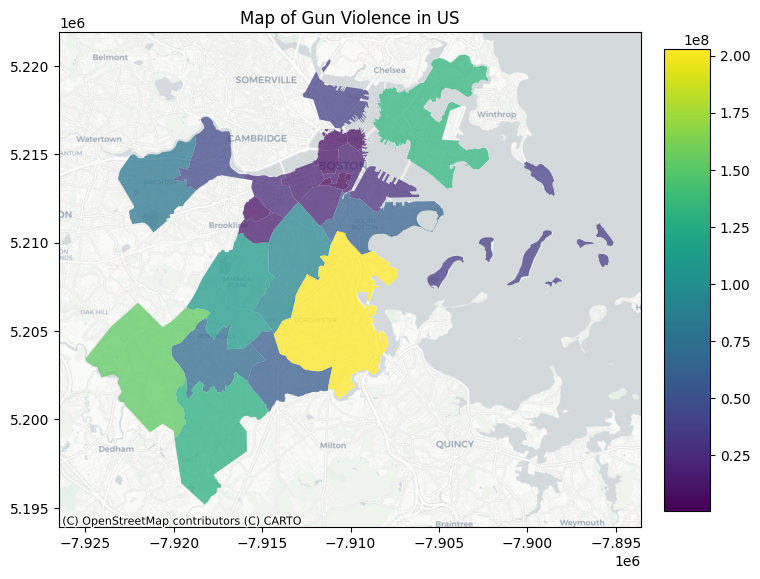

In [22]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf_plot.plot(
    column='Shape Area', 
    ax=ax, 
    alpha=0.75, 
    legend=True,
    legend_kwds={
        "shrink": 0.5,
        "aspect": 10,
        "pad": 0.025,
        "fraction": 0.35,
        "orientation": "vertical"
    }
    )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Map of Gun Violence in US")

plt.show()

### Interactive Data Visualization

In [23]:
gdf.explore(
    m = folium.Map(
        location=[42.32, -71.10], 
        tiles='CartoDB Voyager', # CartoDB Voyager, OpenStreetMap
        zoom_start=11,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': '#301934',
        'weight': 1,
        'opacity': 0.85,
        'fill': True,
        'fillColor': '#CBC3E3',
        'fillOpacity': 0.35
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'green',
        'weight': 2,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': [
            'Name',
            'Acres',
            'Neighborhood ID',
            'Square Miles',
            'Shape Area',
            'Shape Length'
        ]
    }
)



## Methods & Attributes

### Append Geometry Type Feature to GeoDataFrame

In [24]:
print("Geometry Type")

gdf_gt = gdf[['Name', 'Acres', 'Neighborhood ID', 'Square Miles', 'Shape Area', 'Shape Length', 'geometry']].copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


,Name,Acres,Neighborhood ID,Square Miles,Shape Area,Shape Length,geometry,geometry_type
0,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ...",MultiPolygon
1,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.3261, -71.10503 42.3261...",Polygon
2,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.0905 42.3357...",Polygon
3,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337...",Polygon
4,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348...",Polygon
5,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.05838 42.34983, -71.05834 42.349...",Polygon
6,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.05791 42.35238, -71.05811 42.352...",Polygon
7,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.052 42.36884, -71.05219 42.36892...",Polygon
8,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((-71.09646 42.29323, -71.09633 42.293...",Polygon
9,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((-71.06834 42.34775, -71.06913 42.347...",Polygon


### Add Distance Features to Dataset

In [25]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [26]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

,Name,Acres,Neighborhood ID,Square Miles,Shape Area,Shape Length,geometry,dist_from_harvard,frechet_dist_from_harvard,hausdorff_dist_from_harvard
0,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((324683.691 4682166.578, 324667...",8506.568692,11993.241088,11993.241088
1,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((326558.758 4688129.775, 326555.918 4...",4970.091976,9790.564418,9790.564418
2,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((327784.696 4689173.778, 327779.142 4...",4389.711439,5605.099672,5605.099672
3,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((327155.046 4689295.996, 327138.533 4...",3564.390463,4617.719432,4617.719432
4,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((329781.02 4690570.804, 329781.041 46...",4789.716818,5141.173628,5141.173628
5,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((330463.452 4690670.734, 330466.544 4...",5513.029319,5771.447326,5771.447326
6,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((330509.249 4690952.676, 330492.529 4...",5089.377305,5831.778909,5831.778909
7,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((331040.162 4692768.376, 331024.029 4...",4958.594208,5917.090618,5917.090618
8,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((327171.893 4684462.623, 327182.344 4...",4659.542815,9355.490938,9355.490938
9,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((329637.276 4690459.62, 329572.043 46...",4616.096641,6177.216587,6177.216587


### Retrieve Coordinates

In [27]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
            x          y   z
0  -71.125927  42.272013 NaN
0  -71.126109  42.271622 NaN
0  -71.126032  42.271590 NaN
0  -71.125717  42.271521 NaN
0  -71.125590  42.271460 NaN
..        ...        ...  ..
25 -70.960300  42.349095 NaN
25 -70.941823  42.326621 NaN
25 -70.941820  42.326601 NaN
25 -70.941815  42.326590 NaN
25 -70.941823  42.326621 NaN

[32111 rows x 3 columns]

GDF Count Coordinates:
0      870
1     1132
2      261
3      180
4      110
5       50
6      195
7      422
8      720
9      208
10     913
11    6561
12    1519
13     818
14     420
15     688
16    1184
17    1531
18     893
19    1356
20     863
21    4389
22     519
23    2253
24    2037
25    2019
dtype: int32

GDF Count Geometries:
0      3
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     2
13     3
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     2
22     1
23     1
24     1
25    11
dtype: int32


### Some Basic Functions

In [28]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True     25
False     1
dtype: int64

is_valid:
True     25
False     1
dtype: int64

is_valid_reason:
Valid Geometry                                                25
Ring Self-intersection[-71.1257479479601 42.2723471948487]     1
dtype: int64

has_z:
False    26
dtype: int64



### Check if Points Are Within Mapped Polygons

In [29]:
points_to_use = geopandas.GeoSeries([
    Point(-95.67804, 39.04833), # Topeka, Kansas, USA
    Point(-114.0719, 51.0447),  # Calgary, Alberta, Canada
    Point(80.0, -10.0),         # Midpoint in the Indian Ocean
    Point(-19.0208, 64.9631),   # Center of Iceland
    Point(31.1342, 29.9792),    # Pyramids of Giza, Egypt
    Point(86.9250, 27.9881),    # Mount Everest, Nepal
    Point(149.1300, -35.2809)   # Canberra, Australia (Capital City)
])

# Create a GeoDataFrame from points
points_to_use = geopandas.GeoDataFrame(geometry=points_to_use)

# Ensure both GeoDataFrames have the same CRS
points_to_use = points_to_use.set_crs(gdf.crs, allow_override=True)

# Perform spatial join to find points within polygons
points_within = geopandas.sjoin(points_to_use, gdf, predicate='within', how='inner')

print("points_within")
print(points_within)

points_within
Empty GeoDataFrame
Columns: [geometry, index_right, Name, Acres, Neighborhood ID, Square Miles, Shape Area, Shape Length]
Index: []


### Check if Points Are NOT Within Mapped Polygons

In [30]:
points_not_within = points_to_use[~points_to_use.index.isin(points_within.index)]

print("points_not_within")
print(points_not_within)

points_not_within
                     geometry
0  POINT (-95.67804 39.04833)
1   POINT (-114.0719 51.0447)
2              POINT (80 -10)
3    POINT (-19.0208 64.9631)
4     POINT (31.1342 29.9792)
5      POINT (86.925 27.9881)
6     POINT (149.13 -35.2809)


### Some More Functions

In [31]:
gdf.boundary

0     MULTILINESTRING ((-71.12593 42.27201, -71.1261...
1     LINESTRING (-71.10499 42.3261, -71.10503 42.32...
2     LINESTRING (-71.09043 42.33577, -71.0905 42.33...
3     LINESTRING (-71.09811 42.33673, -71.09832 42.3...
4     LINESTRING (-71.06663 42.34878, -71.06663 42.3...
5     LINESTRING (-71.05838 42.34983, -71.05834 42.3...
6     LINESTRING (-71.05791 42.35238, -71.05811 42.3...
7     LINESTRING (-71.052 42.36884, -71.05219 42.368...
8     LINESTRING (-71.09646 42.29323, -71.09633 42.2...
9     LINESTRING (-71.06834 42.34775, -71.06913 42.3...
10    LINESTRING (-71.07569 42.35692, -71.07571 42.3...
11    LINESTRING (-70.99546 42.39394, -70.99557 42.3...
12    MULTILINESTRING ((-71.07416 42.39051, -71.0741...
13    MULTILINESTRING ((-71.06478 42.36882, -71.0649...
14    LINESTRING (-71.07141 42.36119, -71.07308 42.3...
15    LINESTRING (-71.05342 42.3613, -71.05391 42.36...
16    LINESTRING (-71.11011 42.35208, -71.11028 42.3...
17    LINESTRING (-71.13517 42.34601, -71.13823 

In [32]:
gdf_projected.buffer(distance=125)

0     POLYGON ((322807.314 4683898.324, 322807.494 4...
1     POLYGON ((323489.741 4685605.814, 323490.461 4...
2     POLYGON ((325766.224 4688821.858, 325766.511 4...
3     POLYGON ((325945.863 4689472.344, 325949.748 4...
4     POLYGON ((329744.3 4690390.586, 329743.915 469...
5     POLYGON ((330391.094 4690563.154, 330379.353 4...
6     POLYGON ((329590.883 4690588.195, 329590.862 4...
7     POLYGON ((330360.972 4692722.926, 330364.394 4...
8     POLYGON ((326288.196 4685225.652, 326284.158 4...
9     POLYGON ((328497.944 4689510.09, 328495.557 46...
10    POLYGON ((327743.579 4690922.809, 327734.6 469...
11    POLYGON ((331470.711 4693145.514, 331472.659 4...
12    POLYGON ((329302.245 4695346.098, 329307.979 4...
13    POLYGON ((329161.771 4692135.707, 329161.995 4...
14    POLYGON ((328960.826 4691556.334, 328960.743 4...
15    POLYGON ((329665.718 4690650.195, 329659.153 4...
16    POLYGON ((326233.873 4691149.433, 326236.505 4...
17    POLYGON ((321258.922 4689176.439, 321256.8

In [33]:
gdf_projected.centroid

0     POINT (324652.202 4683335.226)
1     POINT (325675.477 4686114.645)
2     POINT (326770.791 4688751.172)
3     POINT (326584.032 4689518.827)
4     POINT (329583.973 4690611.213)
5     POINT (330511.874 4690797.541)
6     POINT (330190.819 4690588.034)
7     POINT (330877.754 4692397.723)
8     POINT (328049.895 4687250.278)
9     POINT (329370.474 4689754.997)
10    POINT (328638.503 4690718.422)
11     POINT (334039.263 4693123.36)
12    POINT (330099.147 4693954.925)
13    POINT (329909.449 4692332.708)
14    POINT (329668.836 4691492.098)
15    POINT (330538.864 4691309.097)
16     POINT (327341.355 4690184.36)
17      POINT (322506.07 4690704.03)
18    POINT (321895.819 4683195.403)
19    POINT (324605.856 4680281.921)
20    POINT (327540.967 4682650.458)
21     POINT (329906.669 4684976.53)
22    POINT (331825.876 4690258.525)
23    POINT (331554.818 4688986.467)
24    POINT (324706.358 4691765.146)
25    POINT (337787.144 4688065.183)
dtype: geometry

In [34]:
gdf.convex_hull

0     POLYGON ((-71.13911 42.26762, -71.13911 42.267...
1     POLYGON ((-71.11956 42.28636, -71.12787 42.291...
2     POLYGON ((-71.10476 42.3261, -71.10488 42.3261...
3     POLYGON ((-71.10479 42.33421, -71.10898 42.334...
4     POLYGON ((-71.06834 42.34775, -71.07281 42.347...
5     POLYGON ((-71.05706 42.34953, -71.05706 42.349...
6     POLYGON ((-71.06027 42.34625, -71.06044 42.346...
7     POLYGON ((-71.05276 42.36094, -71.05456 42.361...
8     POLYGON ((-71.09576 42.29198, -71.10683 42.300...
9     POLYGON ((-71.07208 42.33258, -71.07299 42.333...
10    POLYGON ((-71.08314 42.34154, -71.0857 42.3433...
11    POLYGON ((-71.00761 42.34668, -71.00773 42.346...
12    POLYGON ((-71.06187 42.36851, -71.0646 42.3694...
13    POLYGON ((-71.0708 42.36112, -71.07309 42.3613...
14    POLYGON ((-71.07068 42.3519, -71.07505 42.3553...
15    POLYGON ((-71.05964 42.34474, -71.0699 42.3501...
16    POLYGON ((-71.09058 42.33573, -71.09811 42.336...
17    POLYGON ((-71.15689 42.33025, -71.16753 42

In [35]:
gdf.envelope

0     POLYGON ((-71.14779 42.26762, -71.09961 42.267...
1     POLYGON ((-71.14017 42.28636, -71.09511 42.286...
2     POLYGON ((-71.11404 42.3261, -71.09043 42.3261...
3     POLYGON ((-71.11156 42.33421, -71.09722 42.334...
4     POLYGON ((-71.07281 42.34775, -71.06646 42.347...
5     POLYGON ((-71.05972 42.34953, -71.05588 42.349...
6     POLYGON ((-71.06834 42.34625, -71.05741 42.346...
7     POLYGON ((-71.05902 42.36094, -71.0483 42.3609...
8     POLYGON ((-71.10684 42.29198, -71.06641 42.291...
9     POLYGON ((-71.08314 42.33258, -71.06076 42.332...
10    POLYGON ((-71.09167 42.34154, -71.0699 42.3415...
11    POLYGON ((-71.04572 42.34668, -70.98626 42.346...
12    POLYGON ((-71.08097 42.36851, -71.04732 42.368...
13    POLYGON ((-71.07314 42.36112, -71.05781 42.361...
14    POLYGON ((-71.07565 42.3519, -71.06202 42.3519...
15    POLYGON ((-71.07068 42.34474, -71.04766 42.344...
16    POLYGON ((-71.11098 42.33573, -71.08331 42.335...
17    POLYGON ((-71.17485 42.33025, -71.13517 42

In [36]:
gdf.extract_unique_points()

0     MULTIPOINT (-71.12593 42.27201, -71.12611 42.2...
1     MULTIPOINT (-71.10499 42.3261, -71.10503 42.32...
2     MULTIPOINT (-71.09043 42.33577, -71.0905 42.33...
3     MULTIPOINT (-71.09811 42.33673, -71.09832 42.3...
4     MULTIPOINT (-71.06663 42.34878, -71.06663 42.3...
5     MULTIPOINT (-71.05838 42.34983, -71.05834 42.3...
6     MULTIPOINT (-71.05791 42.35238, -71.05811 42.3...
7     MULTIPOINT (-71.052 42.36884, -71.05219 42.368...
8     MULTIPOINT (-71.09646 42.29323, -71.09633 42.2...
9     MULTIPOINT (-71.06834 42.34775, -71.06913 42.3...
10    MULTIPOINT (-71.07569 42.35692, -71.07571 42.3...
11    MULTIPOINT (-70.99546 42.39394, -70.99557 42.3...
12    MULTIPOINT (-71.07416 42.39051, -71.07417 42.3...
13    MULTIPOINT (-71.06478 42.36882, -71.06492 42.3...
14    MULTIPOINT (-71.07141 42.36119, -71.07308 42.3...
15    MULTIPOINT (-71.05342 42.3613, -71.05391 42.36...
16    MULTIPOINT (-71.11011 42.35208, -71.11028 42.3...
17    MULTIPOINT (-71.13517 42.34601, -71.13823 

In [37]:
gdf.force_2d()

0     MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ...
1     POLYGON ((-71.10499 42.3261, -71.10503 42.3261...
2     POLYGON ((-71.09043 42.33577, -71.0905 42.3357...
3     POLYGON ((-71.09811 42.33673, -71.09832 42.337...
4     POLYGON ((-71.06663 42.34878, -71.06663 42.348...
5     POLYGON ((-71.05838 42.34983, -71.05834 42.349...
6     POLYGON ((-71.05791 42.35238, -71.05811 42.352...
7     POLYGON ((-71.052 42.36884, -71.05219 42.36892...
8     POLYGON ((-71.09646 42.29323, -71.09633 42.293...
9     POLYGON ((-71.06834 42.34775, -71.06913 42.347...
10    POLYGON ((-71.07569 42.35692, -71.07571 42.356...
11    POLYGON ((-70.99546 42.39394, -70.99557 42.394...
12    MULTIPOLYGON (((-71.07416 42.39051, -71.07417 ...
13    MULTIPOLYGON (((-71.06478 42.36882, -71.06492 ...
14    POLYGON ((-71.07141 42.36119, -71.07308 42.361...
15    POLYGON ((-71.05342 42.3613, -71.05391 42.3615...
16    POLYGON ((-71.11011 42.35208, -71.11028 42.352...
17    POLYGON ((-71.13517 42.34601, -71.13823 42

In [38]:
gdf.minimum_bounding_circle()

0     POLYGON ((-71.09951 42.28462, -71.09997 42.279...
1     POLYGON ((-71.09108 42.30873, -71.09156 42.303...
2     POLYGON ((-71.09002 42.33262, -71.09026 42.330...
3     POLYGON ((-71.0972 42.33787, -71.09733 42.3364...
4     POLYGON ((-71.06645 42.34935, -71.06651 42.348...
5     POLYGON ((-71.0557 42.351, -71.05574 42.35059,...
6     POLYGON ((-71.05722 42.34966, -71.05733 42.348...
7     POLYGON ((-71.04786 42.3654, -71.04798 42.3642...
8     POLYGON ((-71.06393 42.31682, -71.06442 42.311...
9     POLYGON ((-71.06052 42.34391, -71.06074 42.341...
10    POLYGON ((-71.06985 42.34915, -71.07006 42.347...
11    POLYGON ((-70.98176 42.37413, -70.98237 42.367...
12    POLYGON ((-71.04726 42.37978, -71.04758 42.376...
13    POLYGON ((-71.0578 42.36353, -71.05795 42.3620...
14    POLYGON ((-71.06191 42.35776, -71.06205 42.356...
15    POLYGON ((-71.04642 42.35618, -71.04666 42.353...
16    POLYGON ((-71.08232 42.34694, -71.08261 42.344...
17    POLYGON ((-71.12871 42.35023, -71.12915 42

In [39]:
gdf.minimum_clearance()

0     3.525125e-08
1     3.215575e-08
2     3.215575e-08
3     4.202121e-08
4     9.520312e-08
5     1.550610e-07
6     4.519512e-08
7     8.219577e-07
8     4.461202e-08
9     1.229612e-07
10    1.039877e-07
11    2.822708e-08
12    1.774408e-07
13    4.569566e-08
14    6.686393e-08
15    4.519512e-08
16    4.283197e-08
17    6.860163e-07
18    3.645680e-08
19    5.690620e-08
20    4.976358e-08
21    6.966258e-08
22    1.689812e-06
23    6.966258e-08
24    4.000243e-07
25    6.474505e-08
dtype: float64

In [40]:
gdf.minimum_rotated_rectangle()

0     POLYGON ((-71.09829 42.27956, -71.11151 42.307...
1     POLYGON ((-71.11082 42.27642, -71.0809 42.3114...
2     POLYGON ((-71.11319 42.32401, -71.08919 42.327...
3     POLYGON ((-71.11297 42.33713, -71.103 42.32995...
4     POLYGON ((-71.07248 42.34662, -71.06615 42.348...
5     POLYGON ((-71.05972 42.35015, -71.05655 42.349...
6     POLYGON ((-71.05702 42.3523, -71.06781 42.3533...
7     POLYGON ((-71.05922 42.36835, -71.05732 42.359...
8     POLYGON ((-71.11501 42.30773, -71.09241 42.289...
9     POLYGON ((-71.05807 42.34407, -71.07181 42.355...
10    POLYGON ((-71.07568 42.36076, -71.09308 42.350...
11    POLYGON ((-71.03043 42.33604, -70.97366 42.360...
12    POLYGON ((-71.08293 42.3792, -71.05569 42.3621...
13    POLYGON ((-71.05789 42.36922, -71.07324 42.369...
14    POLYGON ((-71.0757 42.35196, -71.06207 42.3518...
15    POLYGON ((-71.05913 42.36953, -71.07125 42.351...
16    POLYGON ((-71.08213 42.34265, -71.09868 42.362...
17    POLYGON ((-71.16959 42.32734, -71.1288 42.

In [41]:
gdf.normalize()

0     MULTIPOLYGON (((-71.14779 42.286, -71.14777 42...
1     POLYGON ((-71.14017 42.30209, -71.14002 42.302...
2     POLYGON ((-71.11404 42.32948, -71.11356 42.330...
3     POLYGON ((-71.11156 42.33734, -71.11156 42.337...
4     POLYGON ((-71.07281 42.34783, -71.07251 42.348...
5     POLYGON ((-71.05972 42.35015, -71.05968 42.350...
6     POLYGON ((-71.06834 42.34775, -71.06834 42.347...
7     POLYGON ((-71.05902 42.36759, -71.05881 42.367...
8     POLYGON ((-71.10684 42.30099, -71.10684 42.301...
9     POLYGON ((-71.08314 42.34154, -71.08301 42.341...
10    POLYGON ((-71.09167 42.35024, -71.08949 42.350...
11    POLYGON ((-71.04572 42.37153, -71.04561 42.371...
12    MULTIPOLYGON (((-71.08097 42.38233, -71.08081 ...
13    MULTIPOLYGON (((-71.07314 42.36229, -71.07314 ...
14    POLYGON ((-71.07565 42.35681, -71.07565 42.356...
15    POLYGON ((-71.07068 42.3519, -71.07029 42.3520...
16    POLYGON ((-71.11098 42.35033, -71.11089 42.350...
17    POLYGON ((-71.17485 42.35035, -71.17392 42

In [43]:
gdf.active_geometry_name

'geometry'

### Display Translated (Shifted) Polygons

In [44]:
translated_gdf = gdf.translate(xoff=-0.05, yoff=0.05)

translated_gdf.explore()

### Iterate Through All Rows

In [ ]:
for index, row in gdf.iterrows():
    print("All Data:", row)

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

### Iterate Through All Features

In [ ]:
for feature in gdf.iterfeatures():
    print(feature)

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

### Interface

In [ ]:
gdf.__geo_interface__

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

## Save Cleaned Dataset to File

In [47]:
new_file_name_and_path = 'cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/